# Linear Regression

Basic form of machine learning algorithm used to predict numerical values, it follows a very simple concept, i.e if data points are related linearly then we can generate a line of best fit for these points and use it to predict future values.

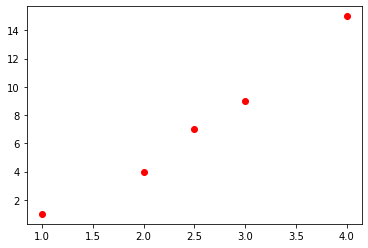

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = [1,2,2.5,3,4]
y = [1,4,7,9,15]

plt.plot(x,y,'ro')

We can see the data has a linear correspondance, i.e as x valu increases so does y, hence we can plot a best fit line.
best fit line refers to the line, through a sctter plot of data points that best expresses the releationship between those points.

Equation obeyed by linear regresssion:

- y = mx + c
- m = slope of best fit line
- c = y intercept
- (x,y) = co-ordinates

Lets dive into some model building examples

In [2]:
!pip install -q sklearn

In [3]:
%tensorflow_version 2.x

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [5]:
url_train = "https://raw.githubusercontent.com/Biswa5812/Machine-Learning/master/Titanic/train.csv"  # training data
url_test = "https://raw.githubusercontent.com/Biswa5812/Machine-Learning/master/Titanic/eval.csv"    # test data

dftrain = pd.read_csv(url_train)
dftest = pd.read_csv(url_test)


In [6]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [7]:
dftest.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,0,male,54.0,0,0,51.8625,First,E,Southampton,y
2,1,female,58.0,0,0,26.5500,First,C,Southampton,y
3,1,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,1,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [8]:
y_train = dftrain.pop('survived')
y_test = dftest.pop('survived')

In [9]:
dftest.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


for more statistical analysis of the dataset

In [10]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


Plotting visual data

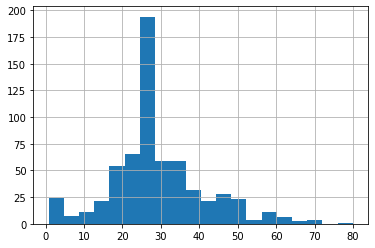

In [11]:
dftrain.age.hist(bins=20)

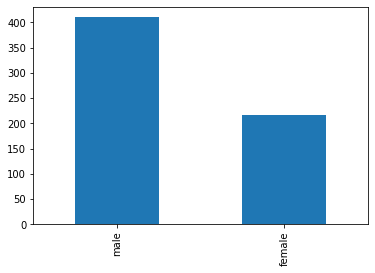

In [12]:
dftrain.sex.value_counts().plot(kind="bar")

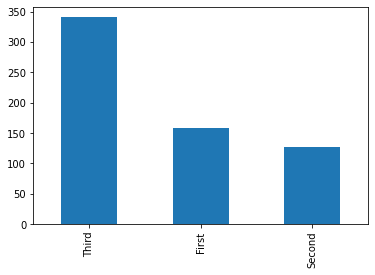

In [13]:
dftrain['class'].value_counts().plot(kind="bar")

Text(0.5, 0, '% survive')

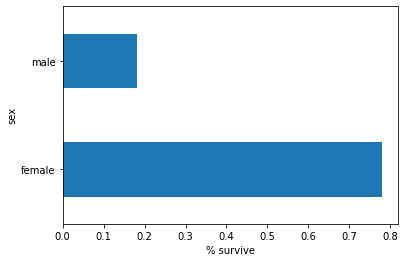

In [14]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

# Training and Testing data

Training data is what we feed to the model so that it can develop and learn.
Testing data is to test how well can we evaluate the model

In [15]:
dftrain.shape

(627, 9)

In [16]:
dftest.shape

(264, 9)

# Feature Columns

In our dataset we have two different kinds of data: Categorical and Numeric.
- Categorical data is anything that is non numerical, also Categorical Data is the data that generally takes a limited number of possible values. Also, the data in the category need not be numerical, it can be textual in nature. 

Example: 'Sex', 'Parch', 'Class'

- But for computation purpose, a machine requires numeric data to work upon. Hence we encode these categorical values by using one hot encoding.

In [17]:
categorical_cols = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
numeric_cols = ['age','fare']


In [18]:
feature_columns = []

dftrain['sex'].unique() #lists out unique values in that particular column

array(['male', 'female'], dtype=object)

In [19]:
for feature_name in categorical_cols:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name,vocabulary))

for feature_name in numeric_cols:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

# Training Process

We now start training our model on the dataset, we train our model in batches of 32 fir this dataset, hence we feed the data multiple times depending on number of epochs.
An epoch is simply one iteration of the dataset.

> Input function:
  - The tensorflow model that we are building requires that we pass the data in as a tf.data.Dataset object. Hence we need a input function to convert our dataset to this object

In [20]:
def make_input_fun(data_df,label_d,num_epochs=10,shuffle=True,batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_d))
    if shuffle:
      ds = ds.shuffle(1000)
    ds = ds.batch(batch_size).repeat(num_epochs)
    return ds
  return input_function

train_input_fn = make_input_fun(dftrain,y_train)
test_input_fn = make_input_fun(dftest,y_test,num_epochs=1,shuffle=False)

# Creating the model

Here we are going to use a linear estimator to utilize the linear regression algorithm.

In [21]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpxsth82zo', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


# Training the model

Training the model is as easy as passing the input function that we created earlier.

In [22]:
linear_est.train(train_input_fn)  # trains the model
result = linear_est.evaluate(test_input_fn)   # will get model metrics and stat by testing on the testing set

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Instructions for updating:
Please use `layer.add_weight` method instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
INFO:tensorflow:Done calling model_fn.
INFO:tensorf

In [23]:
print(result['accuracy'])  # result variable is simply a dict of our model's stats

0.77272725


In [24]:
print(result['recall'])

0.61616164


In [25]:
for r in result.keys():
  print(r,result[r])

accuracy 0.77272725
accuracy_baseline 0.625
auc 0.822314
auc_precision_recall 0.7908332
average_loss 0.49666053
label/mean 0.375
loss 0.4877641
precision 0.73493975
prediction/mean 0.33771148
recall 0.61616164
global_step 200


Testing

In [26]:
result = list(linear_est.predict(test_input_fn)) # tesnorflow models gove out many predictions on various parameters for each data, but in this case we need probabilities
print(result[0]['probabilities'][0]) # probability of non survival of 0th data 

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpxsth82zo/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0.92151064
